In [21]:
import numpy as np
import matplotlib.image as mpimg
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [22]:
# Add %matplotlib inline at top of your code to make sure that the images will be shown inside the Jupyter explorer page.
%matplotlib inline

***Download the dataset “Digit” and its label from this link https://app.box.com/s/sogk96kukv6ayyyy6ym63a2nu3aozif7***<br>
*All files were moved to the Digit folder for easier access*

In [23]:
# Read the dataset file and assigned it to pandas dataframe
df = pd.read_csv("label.csv")
df.head()

,name of the file,digit label
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


In [30]:
# Setting path where images are stored in my local files
all_images = '/Users/angyxajil/Desktop/5th/Fall 2023/4661/Assignment 5/Digit/'

***Build the feature matrix and label vector: Each image is considered as a data sample with pixels as features. Thus, to build the feature table you have to convert each 8x8 image into an array of 64 elements (i.e. 64 pixels), and put it as a row of the feature matrix with 64 feature columns.***

In [32]:
# Arrays to store images and labels
images = []
labels = []

for index, row in df.iterrows():
    image_path = os.path.join(all_images, str(row['name of the file']) + '.jpg') 
    
    # use mpimg.imread(file_name) to load an image
    image = mpimg.imread(image_path)
    
    # Append flattened image data to the list
    images.append(image.flatten())

    # Extract label from the DataFrame
    label = row['digit label']
    labels.append(label)

In [34]:
# Convert to arrays
X = np.array(images)
y = np.array(labels)

***Use sklearn functions to split the dataset into testing and training sets with the following parameters: test_size=0.1, random_state=2***

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 2)

***Use scikit-learn “Random Forest” classifier to recognize the hand-written digits based on the training/testing datasets that you built in part C***

In [41]:
# Use this command to import and define your classifier
my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state = 2)
my_RandomForest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=19, random_state=2)

***Use my_RandomForest.fit for training your random forest classifier and my_RandomForest.predict  for prediction***

In [42]:
predictions = my_RandomForest.predict(X_test)

***Test your Machine Learning Algorithm on testing set (from part(c)), and calculate and report the accuracy.***

In [68]:
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.9277777777777778


***Write some codes to find which one of the data samples (i.e. which images) have been misclassified (classified incorrectly) in your testing set***

In [55]:
misclassified_indices = np.where(predictions != y_test)[0]

***Then, use the following command to show the misclassified images:    plt.imshow(image_name, cmap=plt.cm.gray_r, interpolation='nearest')***

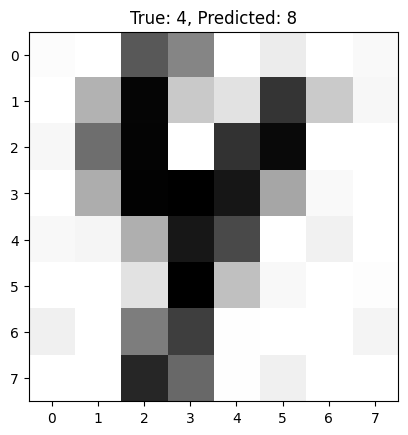

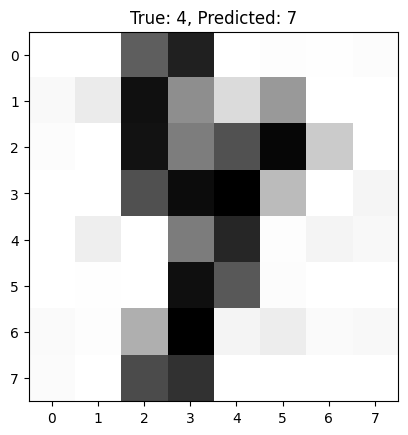

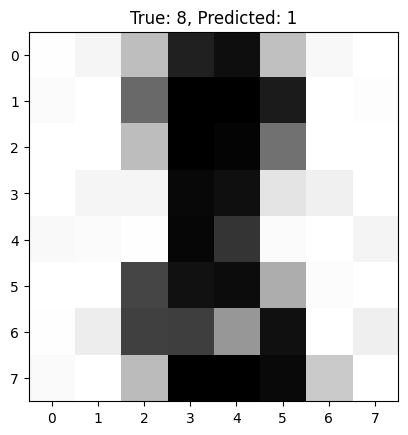

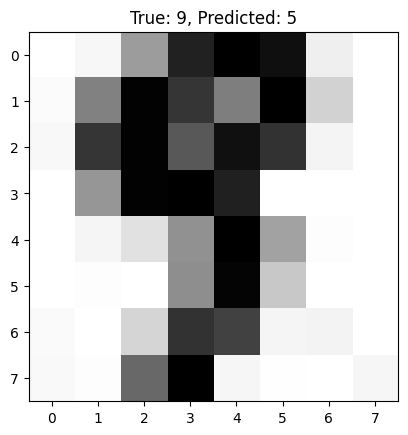

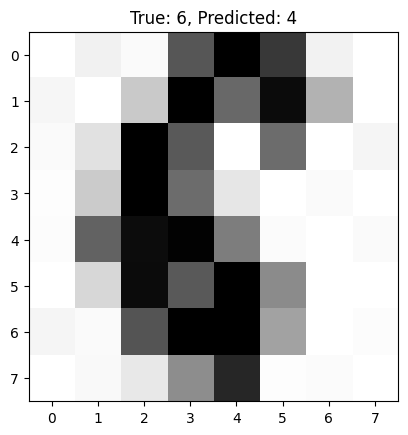

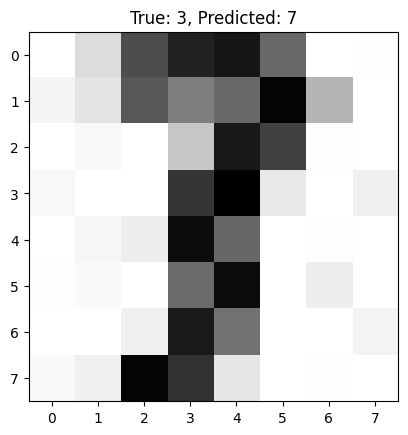

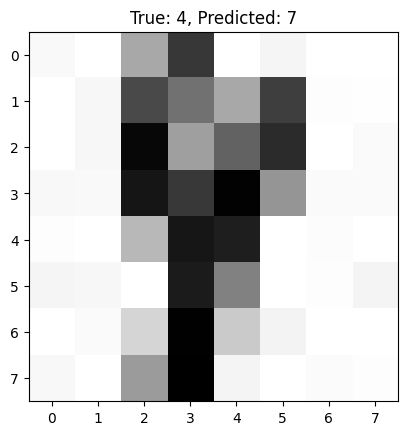

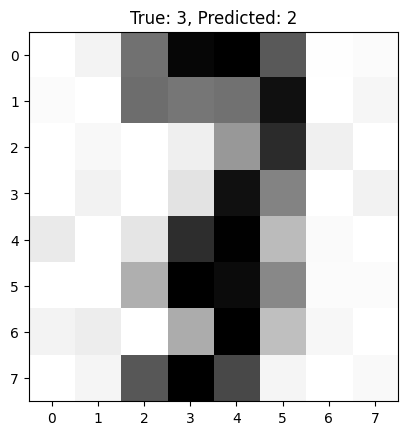

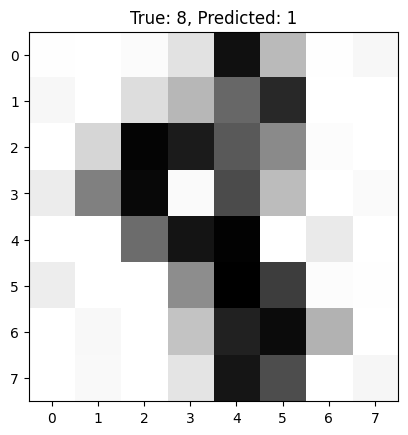

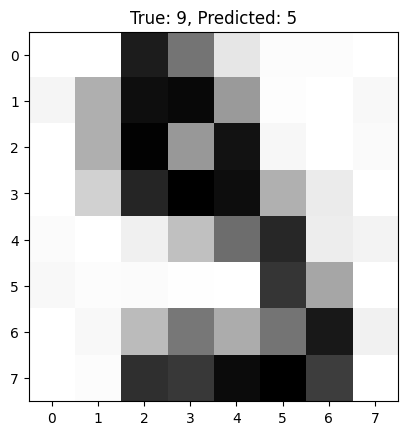

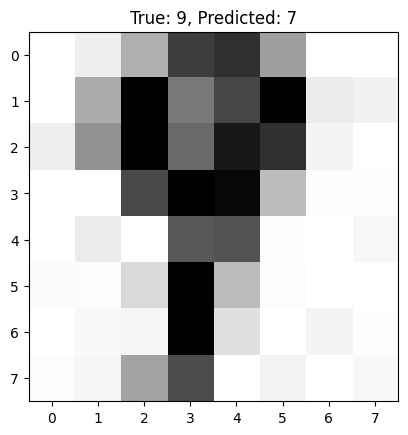

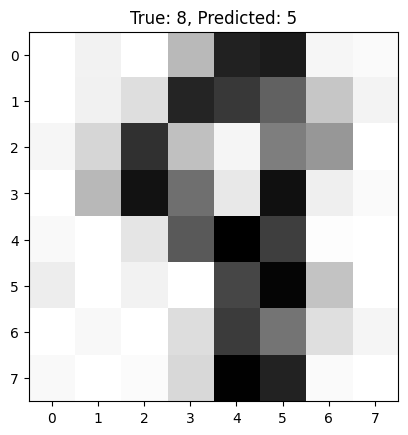

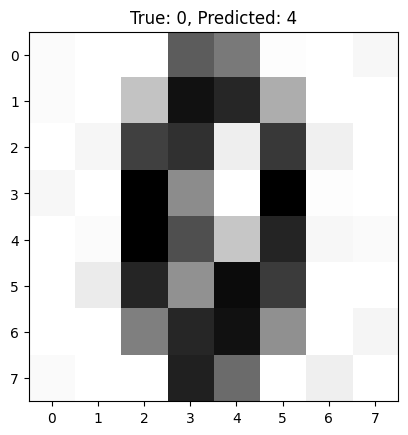

In [66]:
for i in misclassified_indices:
    misclassified_image = X_test[i].reshape(8, 8)
    plt.imshow(misclassified_image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'True: {y_test[i]}, Predicted: {predictions[i]}')
    plt.show()